# Plots music matrix values to determine threshold

In [1]:
#imports
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import midi_manipulation

0.142556


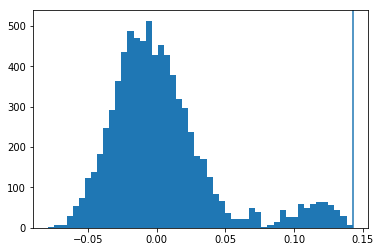

In [8]:
input_path = r'final_tune.txt'
template_path = r'primer.mid'

music_file = open(input_path)
raw_data = music_file.readlines()
data = np.zeros(shape=(len(raw_data), 156))

for r in range(len(raw_data)):
    row = raw_data[r].split('\t')
    for c in range(156):
        data[r][c] = row[c]

template = np.reshape(midi_manipulation.midiToNoteStateMatrix(template_path), [-1])
data = np.reshape(data, [-1])
count = 0
for i in template:
    if i > 0:
        count += 1
fraction = count / len(template)
predicted_threshold = np.percentile(data, (1 - fraction) * 100)
print(predicted_threshold)

plt.hist(data, bins=50)
plt.axvline(predicted_threshold)
plt.show()

music_file.close()